# Introduction of CNN using Keras
## September 21st 2018 


The information and the datasets were obtained from: https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/notebook

## Libraries: 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns #Statistical data visualization 
import itertools #efficient loops

%matplotlib inline

### Sklearn libraries: 

In [16]:
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Keras libraries: 

In [26]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

## 1) Import Data

### 1.1) Train

In [36]:
train = pd.read_csv("/home/razielar/Dropbox/Python3/train.csv")
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
train.shape

(42000, 785)

In [38]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

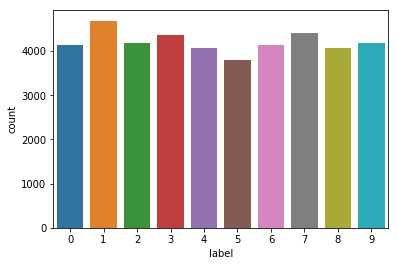

In [40]:
Y_train = train['label']
g = sns.countplot(Y_train)

In [43]:
X_train = train.drop(labels= ['label'], axis= 1)
del train #remove from the environment 
X_train.shape

(42000, 784)

In [52]:
#Check if there're NULL values: 
X_train.isnull().any().describe()
#There's any null value in X_train

count       784
unique        1
top       False
freq        784
dtype: object

### 1.2) Test

In [45]:
test = pd.read_csv("/home/razielar/Dropbox/Python3/test.csv")
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
test.shape

(28000, 784)

In [47]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [53]:
#Check if there're any null value in test
test.isnull().any().describe()
#Any NULL value 

count       784
unique        1
top       False
freq        784
dtype: object

## 2) Normalization 

We are going to normalize the images from colour to gray to reduce the illumination's differences. Moreover CNN converts faster [0..1] than [0..255] 

In [59]:
X_train.max().describe()

count    784.000000
mean     217.676020
std       83.830621
min        0.000000
25%      255.000000
50%      255.000000
75%      255.000000
max      255.000000
dtype: float64

In [61]:
X_train = X_train/255.0
test=test/255.0

In [63]:
test.max().describe()

count    784.000000
mean       0.842702
std        0.339741
min        0.000000
25%        0.996078
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

## 3) Reshape

The information that we have is structured information. However we need to reshape it in 3D arrays: height=28 pxls,
width=28 pxls and one channel (gray scale) 28x28x1. **Keras requires an extra dimension in the end which correspond to channel**

In [75]:
tmp = X_train.values #All the data_frame is converted into a numpy_array 
print(tmp.shape)
del tmp

(42000, 784)


In [95]:
#Convert the DF into a NumPy array and then convert into a 3D array plus the channel needed to Keras

tmp = X_train.values.reshape(-1,28,28,1)

print(str("Dimension of X_train:"),tmp.shape, "\n")
del tmp
value=28*28
print(str("28*28= "), value)
del value

Dimension of X_train: (42000, 28, 28, 1) 

28*28=  784


In [104]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [107]:
print(X_train.shape, "\n")
print(test.shape)

(42000, 28, 28, 1) 

(28000, 28, 28, 1)


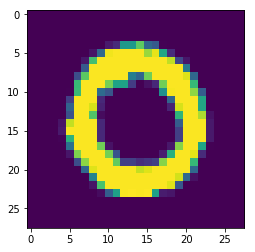

In [111]:
g = plt.imshow(X_train[1][:,:,0]) #First row and the 3 dimensions

## 4) Label encoding

There are 10 labels from 0 until 9. We need to encode these labels to **one hot vectors** (e.g.: 2 -> [0,0,1,0,0,0,0,0,0,0])

In [116]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_train.shape

(42000, 10)

In [118]:
Y_train.max()

1.0

## 5) Split the dataset into train and test 

In [120]:
random_set=2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=random_set)

In [129]:
print(str("X_train: "),X_train.shape, "\n")
print(str("X_test: "),X_val.shape, "\n")

print(str("Y_train: "),Y_train.shape, "\n")
print(str("Y_test: "),Y_val.shape, "\n")

print(str("Train: 37800 + Test:4200= "),37800+4200)

X_train:  (37800, 28, 28, 1) 

X_test:  (4200, 28, 28, 1) 

Y_train:  (37800, 10) 

Y_test:  (4200, 10) 

Train: 37800 + Test:4200=  42000


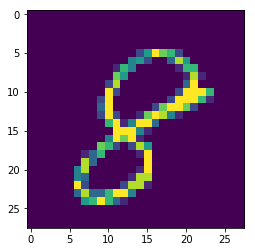

In [130]:
g=plt.imshow(X_train[0][:,:,0])

## 6) CNN using Keras

### 6.1) Setup the model

In [139]:
model = Sequential()
model.add( Conv2D(filters=32, kernel_size= (5,5), padding='Same', activation= 'relu', input_shape=(28,28,1) ) )
model.add(Conv2D(filters=32, kernel_size= (5,5), padding='Same', activation='relu') )
model.add( MaxPool2D(pool_size=(2,2) ) )
model.add( Dropout(0.25) )
model.add( Flatten() )
model.add( Dense(256, activation= 'relu') )
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))

### 6.2) Score_function, Loss_function and Optimization_algorithmn

The **loss function** is to detect the predicted with the observed values. For the optimization algorithmn we are going to use **RMSprop** but also we can use **Gradient Descent** but it's slower. The metric function is **accuracy**. 

In [144]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

## Compile the model: 
model.compile(optimizer=optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'] )
learning_rate_reduction = ReduceLROnPlateau(monitor= 'val_acc', patience= 3, verbose= 1, factor= 0.5, 
                                            min_lr= 0.00001)
epochs=30
batch_size=86


## 7) Data Augmentation

In [146]:
epochs=1
history = model.fit(X_train, Y_train, batch_size= batch_size, epochs= epochs, 
                    validation_data= (X_val, Y_val), verbose= 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/1
 - 84s - loss: 0.1940 - acc: 0.9397 - val_loss: 0.0661 - val_acc: 0.9783


In [149]:
datagen = ImageDataGenerator(featurewise_center= False, samplewise_center= False, 
                             featurewise_std_normalization=False, samplewise_std_normalization=False, 
                             zca_whitening=False,
                             rotation_range=10,#randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.1, #randomly zoom image
                             width_shift_range=0.1,  #randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1, #randomly shift images vertically (fraction of total height)
                             horizontal_flip=False,
                             vertical_flip=False)
X_train.shape

(37800, 28, 28, 1)

In [150]:
datagen.fit(X_train)

### 7.1) Training the model
We increased the number of images in the section above and now we are going to train the model, using **30 epcohs**

In [152]:

history= model.fit_generator(datagen.flow(X_train, Y_train, batch_size= batch_size), 
                             epochs=30, validation_data= (X_val, Y_val),
                             verbose=2, steps_per_epoch=X_train.shape[0] // batch_size, 
                             callbacks=[learning_rate_reduction])


Epoch 1/30
 - 86s - loss: 0.2260 - acc: 0.9321 - val_loss: 0.0522 - val_acc: 0.9864
Epoch 2/30
 - 83s - loss: 0.1364 - acc: 0.9600 - val_loss: 0.0582 - val_acc: 0.9831
Epoch 3/30
 - 83s - loss: 0.1159 - acc: 0.9650 - val_loss: 0.0491 - val_acc: 0.9864
Epoch 4/30
 - 86s - loss: 0.1093 - acc: 0.9695 - val_loss: 0.0793 - val_acc: 0.9779

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/30
 - 89s - loss: 0.0894 - acc: 0.9741 - val_loss: 0.0375 - val_acc: 0.9888
Epoch 6/30
 - 86s - loss: 0.0850 - acc: 0.9760 - val_loss: 0.0447 - val_acc: 0.9898
Epoch 7/30
 - 87s - loss: 0.0834 - acc: 0.9760 - val_loss: 0.0414 - val_acc: 0.9886
Epoch 8/30
 - 89s - loss: 0.0851 - acc: 0.9755 - val_loss: 0.0448 - val_acc: 0.9895
Epoch 9/30
 - 88s - loss: 0.0864 - acc: 0.9758 - val_loss: 0.0415 - val_acc: 0.9902
Epoch 10/30
 - 89s - loss: 0.0845 - acc: 0.9766 - val_loss: 0.0387 - val_acc: 0.9895
Epoch 11/30
 - 88s - loss: 0.0892 - acc: 0.9759 - val_loss: 0.0388 - val_acc: 

## 8) Confusion Matrix

In [157]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap= plt.cm.Blues):
    """This function prints and plots a confusion_matrix
    Nomrlization can be applied by setting: normalize=True"""

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
            horizontalalignment="center",
            color= 'white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 8.1) Let's make the prediction from the trained model

In [154]:
Y_pred = model.predict(X_val)
#Convert the predictions into one hot vector
Y_pred_classes = np.argmax(Y_pred, axis=1)

In [155]:
#Convert test values into one hot vector 
Y_true = np.argmax(Y_val, axis=1)

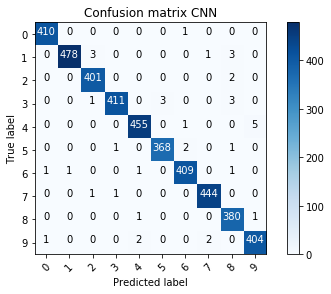

In [159]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(cm= confusion_mtx, classes= range(10), title= 'Confusion matrix CNN')

## 9) Find our errors

In [164]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

In [174]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels """
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for i in range(nrows):
        for j in range(ncols):
            error = errors_index[n]
            ax[i, j].imshow((img_errors[error]).reshape((28,28)))
            ax[i, j].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

### 9.1) Probabilities of the wrong predicted numbers

In [169]:
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis= 1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

### 9.2) Top 6 errors

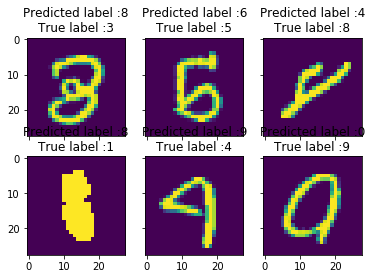

In [175]:
most_important_errors = sorted_delta_errors[-6:]
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 10) Save the predictions

In [176]:
!pwd

/home/razielar/Documents/Deep-Learning-AI-Barcelona-2018/CNN


In [181]:
results = model.predict(test)
results = np.argmax(results, axis= 1)
results = pd.Series(results, name="Label1")
submission = pd.concat([pd.Series(range(1, 28001), name= "ImageID"), results], axis= 1)
submission.to_csv("/home/razielar/Documents/Deep-Learning-AI-Barcelona-2018/CNN/Datasets/CNN_submission.Kaggle.CNN.csv",
                 index = False)